# Tugas 4 Deep Learning - Batik Classification - CNN

### Kelompok 3
- Muhammad Alvinza (2304879)
- Muhammad Ichsan Khairullah (2306924)
- Abdurrahman Rauf Budiman (2301102)
- Rasendriya Andhika (2305309)

# Pendahuluan

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import keras_cv
import tensorflow as tf
from tensorflow.keras import layers
import os

## Pemrosesan Data

### Data Raw

In [2]:
# Tentukan lokasi dataset kamu
data_dir = 'Dataset/USED_DATASETS' # Ganti dengan path folder aslimu

# Parameter Gambar
batch_size = 32       # Jumlah gambar yang diproses sekaligus
img_height = 224      # Tinggi gambar (pixel)
img_width = 224       # Lebar gambar (pixel)

# Memuat data untuk Training (80% data)
raw_train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,   # Mengambil 20% data untuk validasi
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

# Memuat data untuk Validasi (20% data)
raw_val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

# Cek nama kelas yang ditemukan
class_names = raw_train_ds.class_names
print("Kelas yang ditemukan:", class_names)

Found 1000 files belonging to 2 classes.
Using 800 files for training.
Found 1000 files belonging to 2 classes.
Using 200 files for validation.
Kelas yang ditemukan: ['batik_megamendung', 'batik_parang']


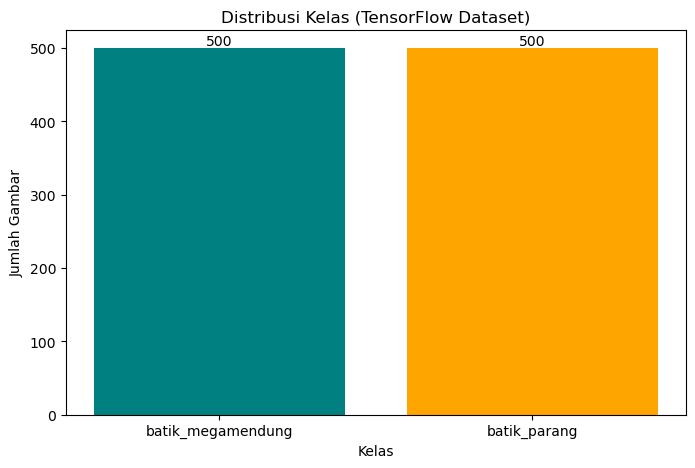

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# ambil nama kelas dari dataset
class_names = raw_train_ds.class_names
counts = {}

# Inisialisasi counter
for name in class_names:
    counts[name] = 0

# mengambil data dari dataset train
for images, labels in raw_train_ds.unbatch():
    label_index = labels.numpy()
    class_name = class_names[label_index]
    counts[class_name] += 1
    
# mengambil data dari dataset validasi
for images, labels in raw_val_ds.unbatch():
    label_index = labels.numpy()
    class_name = class_names[label_index]
    counts[class_name] += 1

# Persiapan data untuk plot
names = list(counts.keys())
values = list(counts.values())

# Tampilkan Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(names, values, color=['teal', 'orange'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, int(yval), ha='center', va='bottom')

plt.title('Distribusi Kelas (TensorFlow Dataset)')
plt.xlabel('Kelas')
plt.ylabel('Jumlah Gambar')
plt.show()

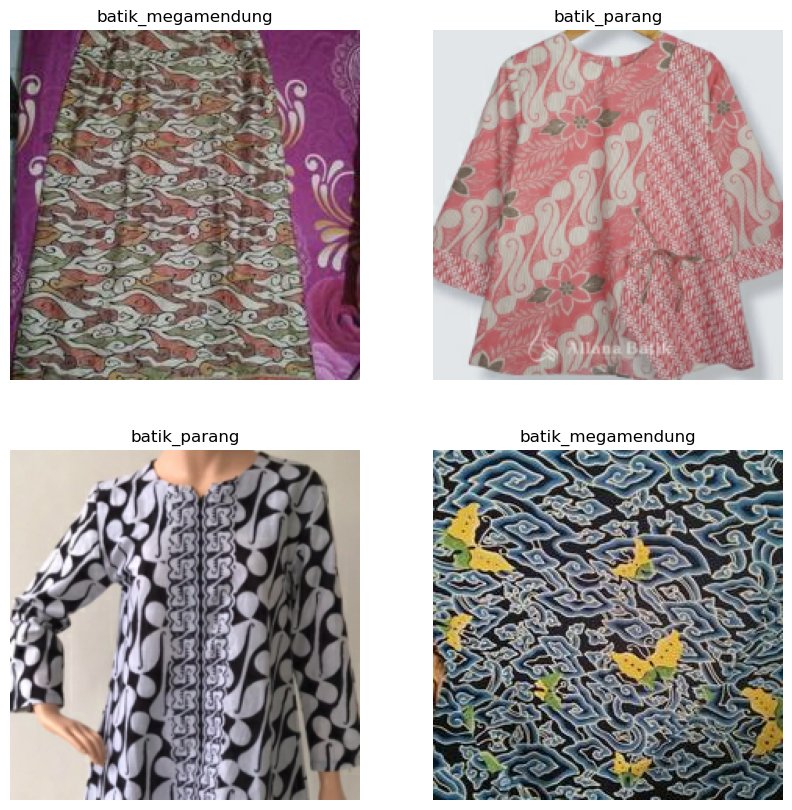

In [4]:
plt.figure(figsize=(10, 10))
for images, labels in raw_train_ds.take(1):
    for i in range(4):
        ax = plt.subplot(2, 2, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"),)
        plt.title(class_names[labels[i]])
        plt.axis("off")

### Data Experimen

In [5]:
# Tentukan lokasi dataset kamu
data_dir = 'Dataset/USED_DATASETS' # Ganti dengan path folder aslimu

# Parameter Gambar
batch_size = 32       # Jumlah gambar yang diproses sekaligus
img_height = 224      # Tinggi gambar (pixel)
img_width = 224       # Lebar gambar (pixel)

# Memuat data untuk Training (80% data)
gs_train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,   # Mengambil 20% data untuk validasi
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode='grayscale'
    )


# Memuat data untuk Validasi (20% data)
gs_val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode='grayscale'
    )

# Cek nama kelas yang ditemukan
class_names = gs_train_ds.class_names
print("Kelas yang ditemukan:", class_names)

Found 1000 files belonging to 2 classes.
Using 800 files for training.
Found 1000 files belonging to 2 classes.
Using 200 files for validation.
Kelas yang ditemukan: ['batik_megamendung', 'batik_parang']


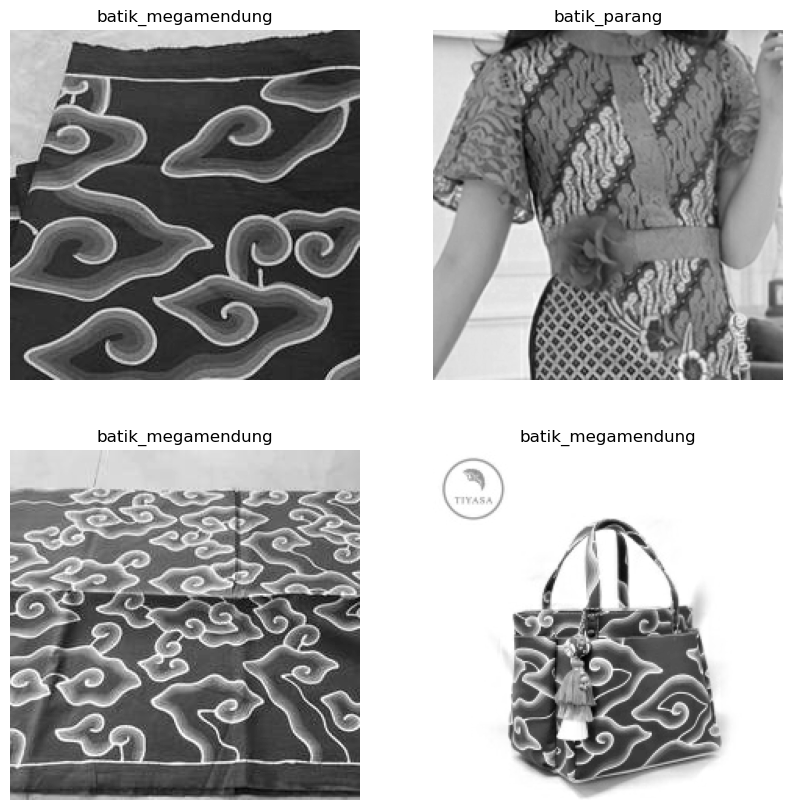

In [6]:
plt.figure(figsize=(10, 10))
for images, labels in gs_train_ds.take(1):
    for i in range(4):
        ax = plt.subplot(2, 2, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"), cmap='gray')
        plt.title(class_names[labels[i]])
        plt.axis("off")

#### Data Augmentation

In [ ]:
data_augmentation = tf.keras.Sequential([
    # Membalik gambar secara horizontal (Cermin)
    layers.RandomFlip("horizontal"),
    
    # Memutar gambar secara acak. Batik terkadang diposisikan secara terbalik, jadi rotasi bisa 180 derajat.
    layers.RandomRotation(1), 
    
    # Zoom in/out secara acak (maksimal 20%)
    layers.RandomZoom(0.2),
    
    # Menggeser gambar tinggi/lebar secara acak (maksimal 10%)
    layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
    
    # Mengubah kontras untuk pencahayaan
    layers.RandomContrast(0.2),
    
    keras_cv.layers.RandomCutout(height_factor=0.15, width_factor=0.15) # random cutout
])

### Hasil Experiment

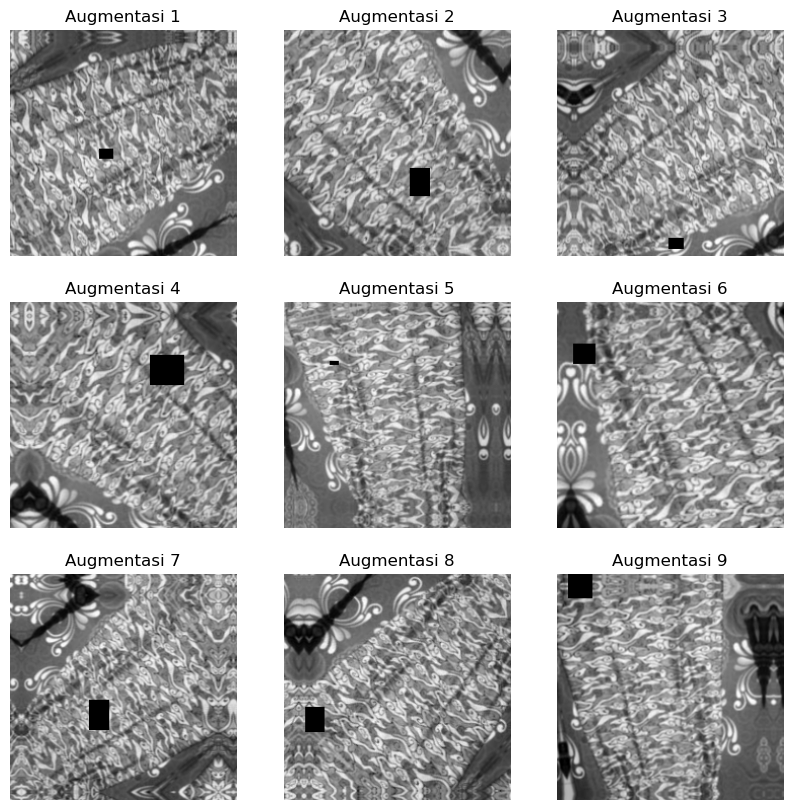

In [8]:
plt.figure(figsize=(10, 10))

# Ambil 1 gambar dari dataset training
for images, _ in gs_train_ds.take(1):
    first_image = images[0]
    
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        
        # Terapkan augmentasi ke gambar yang SAMA berulang kali
        augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
        
        # Tampilkan
        # Perlu .squeeze() jika kamu pakai grayscale sebelumnya
        # Jika RGB, hapus .squeeze() atau biarkan jika tidak error
        plt.imshow(augmented_image[0].numpy().astype("uint8").squeeze(), cmap='gray' if first_image.shape[-1] == 1 else None)
        
        plt.title(f"Augmentasi {i+1}")
        plt.axis("off")